In [53]:
#Import necessary Libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load dataset
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")
print("customers dataset:\n", customers.head(5))
print("products dataset:\n", products.head(5))
print("transactions dataset:\n", transactions.head(5))

customers dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
products dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
transactions dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

In [55]:
# Merging Dataset
merged_data = transactions.merge(customers, on = "CustomerID")

In [56]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [57]:
#Feature Engineering
customer_features = merged_data.groupby("CustomerID").agg(
    total_spent = ("TotalValue", "sum"),
    purchase_frequency = ("TransactionID", "count"),
    avy_trnsaction_value = ("TotalValue", "mean"),
    region = ("Region", "first"), # assuming region is consistent per customer
)
customer_features

,total_spent,purchase_frequency,avy_trnsaction_value,region
CustomerID,,,,
C0001,3354.52,5,670.904000,South America
C0002,1862.74,4,465.685000,Asia
C0003,2725.38,4,681.345000,South America
C0004,5354.88,8,669.360000,South America
C0005,2034.24,3,678.080000,Asia
...,...,...,...,...
C0196,4982.88,4,1245.720000,Europe
C0197,1928.65,3,642.883333,Europe
C0198,931.83,2,465.915000,Europe


In [58]:
# Convert categorical to numerical using one-hot encoding
customer_features = pd.get_dummies(customer_features, columns = ["region"], drop_first=True)

In [59]:
#Standardize the features
scaler = StandardScaler()
Scaler_data = scaler.fit_transform(customer_features)

In [60]:
#Determine optimal number of clusters (using Elbow Method or Silhouette Score)
inertia = []
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(Scaler_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(Scaler_data, kmeans.labels_))
print("Silhouette Score:\n")
sil_scores


Silhouette Score:



[np.float64(0.21197869335476524),
 np.float64(0.28548389939558455),
 np.float64(0.3289869262776683),
 np.float64(0.3303172676214734),
 np.float64(0.3345009559438784),
 np.float64(0.36769938175301686),
 np.float64(0.36702129117199733),
 np.float64(0.3750912592673202),
 np.float64(0.37814926523416736)]

In [64]:
kmeans_k4 = KMeans(n_clusters=4, random_state=42)
kmeans_k4.fit(Scaler_data)  # Fit the model before accessing inertia_
inertia_k4 = kmeans_k4.inertia_
print("Inertia value is: \n", inertia_k4)


Inertia value is: 
 579.5172353011878


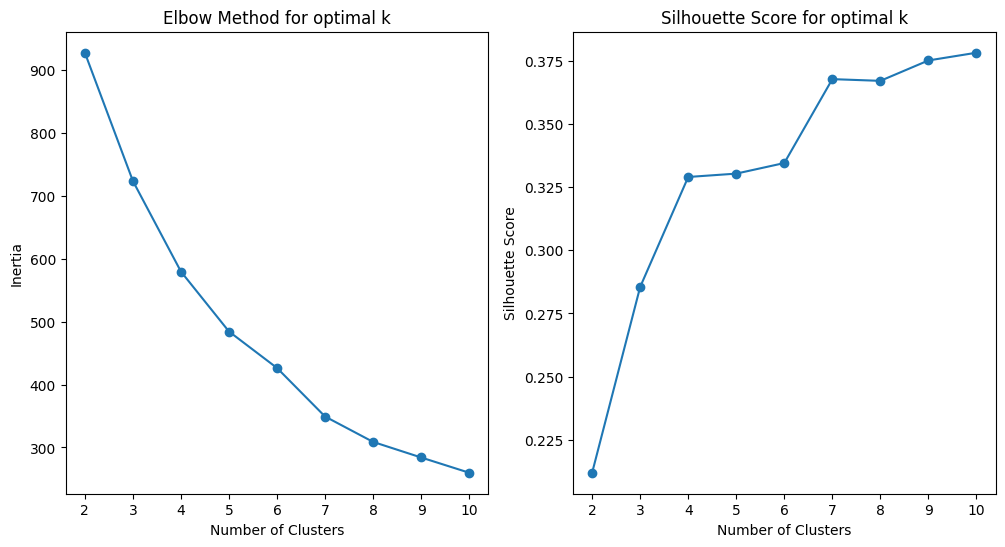

In [12]:
#plot elbow method and silhouette score
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(range(2, 11), inertia, marker="o")
plt.title("Elbow Method for optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker="o")
plt.title("Silhouette Score for optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [13]:
# Choose the optimal k (based on elbow method or silhouette score)
optimal_k = 4 # based on analysis

In [30]:
#Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(Scaler_data)


CustomerID
C0001    1
C0002    3
C0003    1
C0004    0
C0005    3
        ..
C0196    2
C0197    2
C0198    2
C0199    2
C0200    0
Name: Cluster, Length: 199, dtype: int32

In [16]:
#PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(Scaler_data)

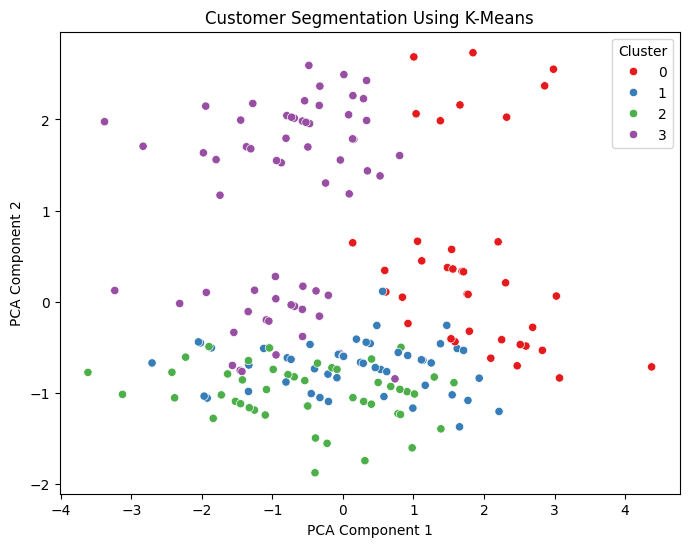

In [17]:
#Visualize the clusters
plt.figure(figsize = (8, 6))
sns.scatterplot(x = pca_components[:, 0], y = pca_components[:, 1], hue=customer_features["Cluster"], palette = "Set1")
plt.title("Customer Segmentation Using K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [37]:
#Evaluate with DB Index
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(Scaler_data, customer_features["Cluster"])
print("DB index:\n", db_index)

DB index:
 1.1896065659883583


In [21]:
# Additionl insights: Characterstics of each cluster
for cluster in range(optimal_k):
    cluster_info = customer_features[customer_features["Cluster"]== cluster]
    print("Cluster: \n", cluster, "\n", cluster_info.describe(), "\n")

Cluster: 
 0 
         total_spent  purchase_frequency  avy_trnsaction_value  Cluster
count     37.000000           37.000000             37.000000     37.0
mean    5970.580541            8.000000            760.216105      0.0
std     1358.481426            1.414214            172.621647      0.0
min     3141.830000            5.000000            392.728750      0.0
25%     5294.990000            7.000000            669.360000      0.0
50%     5848.970000            8.000000            745.344444      0.0
75%     6708.100000            9.000000            860.257143      0.0
max    10673.870000           11.000000           1122.050000      0.0 

Cluster: 
 1 
        total_spent  purchase_frequency  avy_trnsaction_value  Cluster
count    50.000000           50.000000             50.000000     50.0
mean   3211.467600            4.680000            674.496806      1.0
std    1510.299914            1.707606            233.217661      0.0
min     223.960000            1.000000           

C:\Users\nkhar\AppData\Local\Temp\ipykernel_18844\170649472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend_by_cluster.index, y=avg_spend_by_cluster.values, palette="viridis")


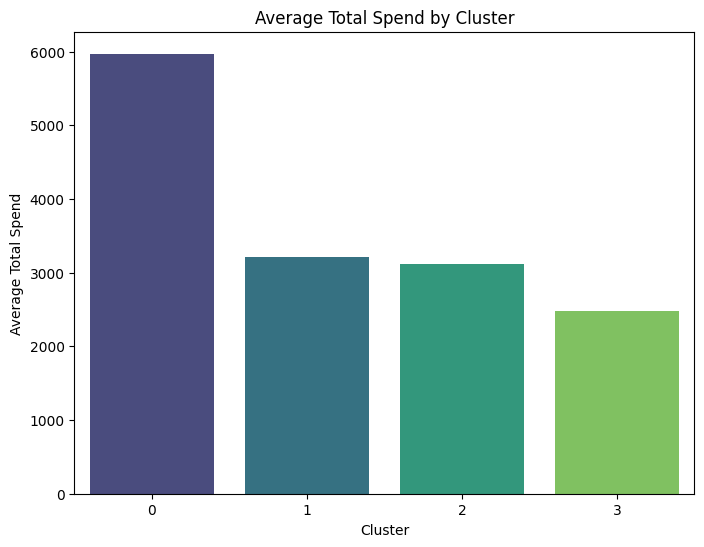

In [47]:
# Average total spent by Cluster Graph
avg_spend_by_cluster = customer_features.groupby("Cluster")["total_spent"].mean()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_spend_by_cluster.index, y=avg_spend_by_cluster.values, palette="viridis")
plt.title("Average Total Spend by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Total Spend")
plt.show()

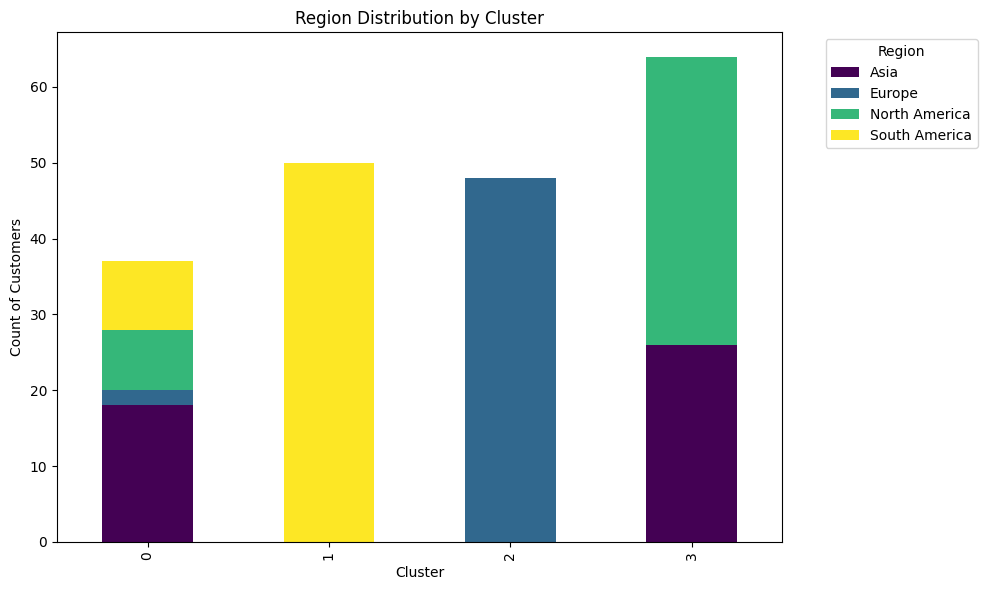

In [50]:

# Region distribution by cluster graph
region_counts = customer_features.groupby(["Cluster", "region"]).size().unstack()

# Plotting
region_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Region Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count of Customers")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()